# 1. Scikit Learn - Introduction to Supervised Learning Problem and Cross Validation

In [1]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn

from sklearn import model_selection
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

plt.style.use('fivethirtyeight') # Good looking plots
pd.set_option('display.max_columns', None) # Display any number of columns

import seaborn as sns

In [2]:
import io
import requests
url="https://raw.githubusercontent.com/bugra/pydata-dal-2015/master/data/churn.csv"
df=pd.read_csv(url)

In [3]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
# Discrete value integer encoder
label_encoder = preprocessing.LabelEncoder()

# Get the Labels as integers
df['Churn'] = df['Churn?'] == 'True.'
y = df['Churn'].as_matrix().astype(np.int)

# State is string and we want to get discrete integer values
df['State'] = label_encoder.fit_transform(df['State'])

# Drop the redundant columns from dataframe
df.drop(['Area Code','Phone','Churn?', 'Churn'], axis=1, inplace=True)

# Get the features as integers similar to what we did for labels(targets)
df[["Int'l Plan","VMail Plan"]] = df[["Int'l Plan","VMail Plan"]] == 'yes'

In [5]:
df.head(11)

,State,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,16,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
5,1,118,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
6,19,121,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3
7,24,147,True,False,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0
8,18,117,False,False,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
9,49,141,True,True,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0


In [6]:
print('There are {} instances for churn class and {} instances for not-churn classes.'.format(y.sum(), y.shape[0] - y.sum()))
print('Ratio of churn class over all instances: {:.2f}'.format(float(y.sum()) / y.shape[0]))

There are 483 instances for churn class and 2850 instances for not-churn classes.
Ratio of churn class over all instances: 0.14


In [7]:
X = df.as_matrix().astype(np.float)
X

array([[  16.  ,  128.  ,    0.  , ...,    3.  ,    2.7 ,    1.  ],
       [  35.  ,  107.  ,    0.  , ...,    3.  ,    3.7 ,    1.  ],
       [  31.  ,  137.  ,    0.  , ...,    5.  ,    3.29,    0.  ],
       ..., 
       [  39.  ,   28.  ,    0.  , ...,    6.  ,    3.81,    2.  ],
       [   6.  ,  184.  ,    1.  , ...,   10.  ,    1.35,    2.  ],
       [  42.  ,   74.  ,    0.  , ...,    4.  ,    3.7 ,    0.  ]])

In [8]:
X.shape

(3333, 18)

In [9]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
print (X.shape)
X

(3333, 18)


array([[-0.6786493 ,  0.67648946, -0.32758048, ..., -0.60119509,
        -0.0856905 , -0.42793202],
       [ 0.6031696 ,  0.14906505, -0.32758048, ..., -0.60119509,
         1.2411686 , -0.42793202],
       [ 0.33331299,  0.9025285 , -0.32758048, ...,  0.21153386,
         0.69715637, -1.1882185 ],
       ..., 
       [ 0.87302621, -1.83505538, -0.32758048, ...,  0.61789834,
         1.3871231 ,  0.33235445],
       [-1.35329082,  2.08295458,  3.05268496, ...,  2.24335625,
        -1.87695028,  0.33235445],
       [ 1.07541867, -0.67974475, -0.32758048, ..., -0.19483061,
         1.2411686 , -1.1882185 ]])

# Cross validation

In [10]:
cv_url = 'http://i.imgur.com/N9HZktu.png'
Image(url=cv_url)

In [11]:
stratified_k_fold = model_selection.StratifiedKFold(n_splits=10, shuffle=True)
print (stratified_k_fold)

StratifiedKFold(n_splits=10, random_state=None, shuffle=True)


In [12]:
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = model_selection.StratifiedKFold(n_splits=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    for i, j in stratified_k_fold.split(X, y):
        X_train, X_test = X[i], X[j]
        y_train = y[i]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[j] = clf.predict(X_test)
    return y_pred

In [13]:
print('Passive Aggressive Classifier: {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, linear_model.PassiveAggressiveClassifier))))
print('Gradient Boosting Classifier:  {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):   {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, svm.SVC))))
print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier: {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))))
print('Logistic Regression:           {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, linear_model.LogisticRegression))))

/Users/viswanathravindran/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Passive Aggressive Classifier: 0.81
Gradient Boosting Classifier:  0.95
Support vector machine(SVM):   0.92
Random Forest Classifier:      0.94
K Nearest Neighbor Classifier: 0.90
Logistic Regression:           0.86


In [14]:
# Scores seem very good, but if I predicted all of the labels 0, what would I get as accuracy rate? 
print('Dump Classifier: {:.2f}'.format(metrics.accuracy_score(y, [0 for ii in y.tolist()])))

Dump Classifier: 0.86


This is because again of the unbalanced dataset problem. Since one class is 6 times of other class. I could get fairly accurate prediction if I predict the common class. What I need to look at as a metric if the classifier is doing well is to see the errors over the classes. Confusion matrices give a perfect way to see the distribution, which I will exactly use as a next step.

In most of the cases where there is an unbalanced class problem Confusion Matrix comes to our rescue where we can understand things in great detail. Scikit learn in Python provides a 2-D matrix for the confusion matrix under metrics submodule, Combiniing the confusion matrix along with visualization from seaborn provides helps us to see things even better.

In [15]:
pass_agg_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, linear_model.PassiveAggressiveClassifier))
grad_ens_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))
decision_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, tree.DecisionTreeClassifier))
ridge_clf_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, linear_model.RidgeClassifier))
svm_svc_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, svm.SVC))
random_forest_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, ensemble.RandomForestClassifier))
k_neighbors_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))
logistic_reg_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, linear_model.LogisticRegression))
dumb_conf_matrix = metrics.confusion_matrix(y, [0 for ii in y.tolist()]); # ignore the warning as they are all 0

conf_matrix = {
                1: {
                    'matrix': pass_agg_conf_matrix,
                    'title': 'Passive Aggressive',
                   },
                2: {
                    'matrix': grad_ens_conf_matrix,
                    'title': 'Gradient Boosting',
                   },
                3: {
                    'matrix': decision_conf_matrix,
                    'title': 'Decision Tree',
                   },
                4: {
                    'matrix': ridge_clf_conf_matrix,
                    'title': 'Ridge',
                   },
                5: {
                    'matrix': svm_svc_conf_matrix,
                    'title': 'Support Vector Machine',
                   },
                6: {
                    'matrix': random_forest_conf_matrix,
                    'title': 'Random Forest',
                   },
                7: {
                    'matrix': k_neighbors_conf_matrix,
                    'title': 'K Nearest Neighbors',
                   },
                8: {
                    'matrix': logistic_reg_conf_matrix,
                    'title': 'Logistic Regression',
                   },
                9: {
                    'matrix': dumb_conf_matrix,
                    'title': 'Dumb',
                   },
}

/Users/viswanathravindran/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


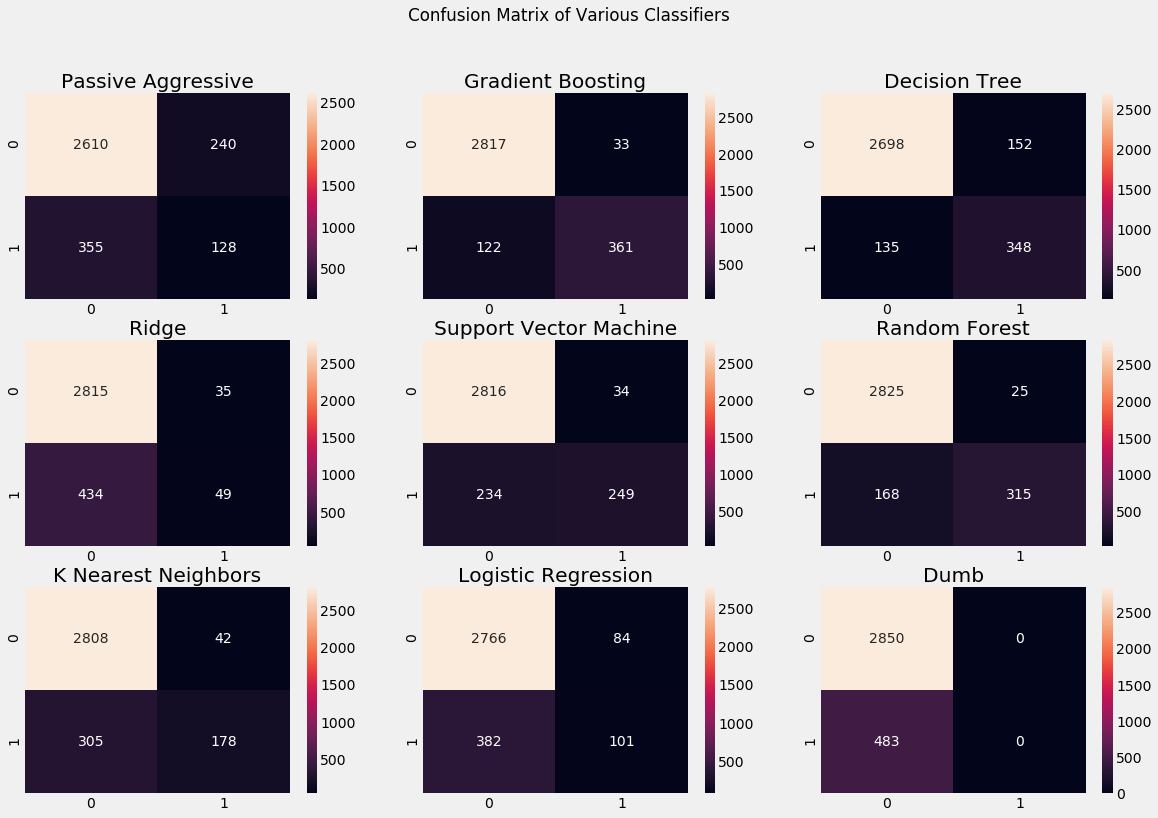

In [16]:
fig, ax = plt.subplots(figsize=(18, 12))
plt.suptitle('Confusion Matrix of Various Classifiers')
for ii, values in conf_matrix.items():
    matrix = values['matrix']
    title = values['title']
    plt.subplot(3, 3, ii) # starts from 1
    plt.title(title);
    sns.heatmap(matrix, annot=True,  fmt='');

In [17]:
# Accuracy vs Precision vs Recall vs F1-score
print('Passive Aggressive Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, linear_model.PassiveAggressiveClassifier))))
print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, svm.SVC))))
print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))))
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, linear_model.LogisticRegression))))
print('Dump Classifier:\n {}\n'.format(metrics.classification_report(y, [0 for ii in y.tolist()]))); # ignore the warning as they are all 0

/Users/viswanathravindran/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Passive Aggressive Classifier:
              precision    recall  f1-score   support

          0       0.89      0.90      0.89      2850
          1       0.36      0.34      0.35       483

avg / total       0.81      0.82      0.82      3333


Gradient Boosting Classifier:
              precision    recall  f1-score   support

          0       0.96      0.99      0.97      2850
          1       0.93      0.75      0.83       483

avg / total       0.96      0.96      0.95      3333


Support vector machine(SVM):
              precision    recall  f1-score   support

          0       0.92      0.99      0.95      2850
          1       0.87      0.51      0.64       483

avg / total       0.91      0.92      0.91      3333


Random Forest Classifier:
              precision    recall  f1-score   support

          0       0.95      0.99      0.97      2850
          1       0.93      0.67      0.78       483

avg / total       0.94      0.94      0.94      3333


K Nearest Neighb

/Users/viswanathravindran/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

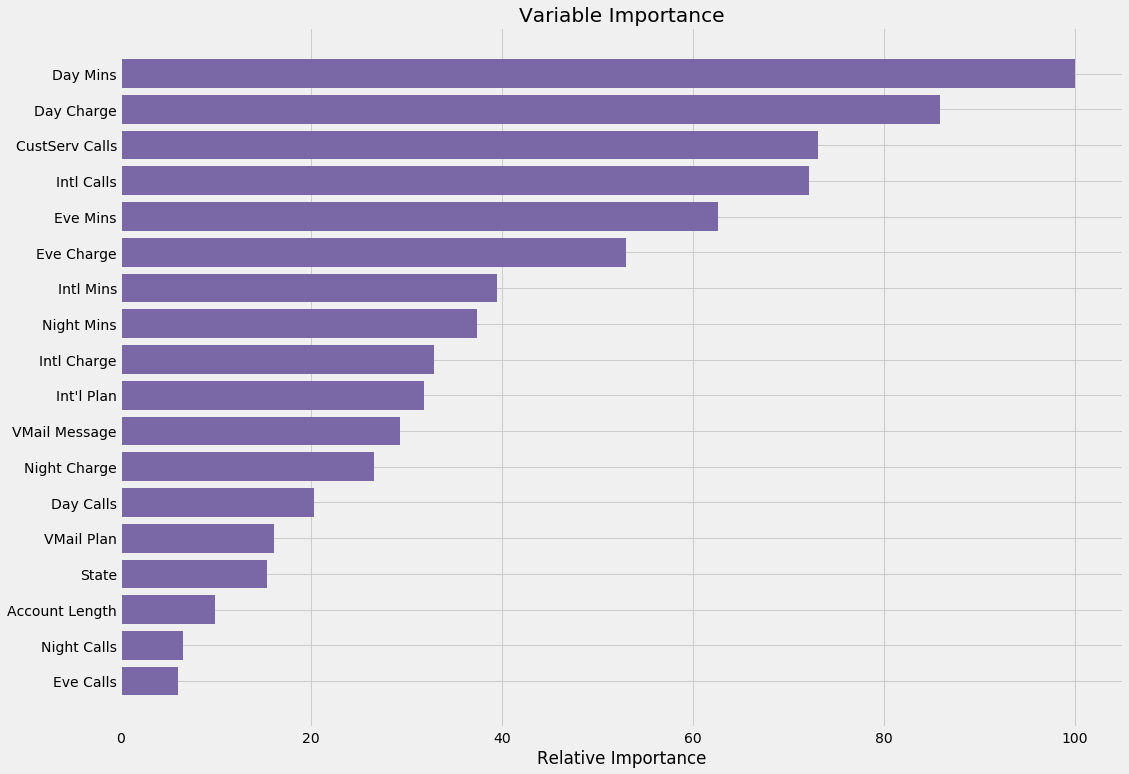

In [19]:
# Get Feature Importance from the classifier
feature_importance = gbc.feature_importances_
# Normalize The Features
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(16, 12))
plt.barh(pos, feature_importance[sorted_idx], align='center', color='#7A68A6')
plt.yticks(pos, np.asanyarray(df.columns.tolist())[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Scaled and Polynomial Features
If you think, when some of the features come together, they could form a much more powerful feature, or just by getting the square of the feature would be powerful feature, then Scikit-Learn has something that quite fits to your needs. Let's aasume I have [x, y] feature vector and I am interested in  [1, x, y, x^2, xy, y^2], in the preprocessing step, I could use PolynomialFeatures of Scikit-Learn to build that feature matrix. If I just want to only get the interaction features(not x^2, then it is enough to pass interaction_only=True and include_bias=False. If you want to get higher order Polynomial features(say nth degree), pass degree=n optional parameter to Polynomial Features.

In [20]:
X = df.as_matrix().astype(np.float)
polynomial_features = preprocessing.PolynomialFeatures()
X = polynomial_features.fit_transform(X)

print (X.shape)

(3333, 190)


In [21]:
print('Passive Aggressive Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, linear_model.PassiveAggressiveClassifier))))
print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, svm.SVC))))
print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))))
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, linear_model.LogisticRegression))))
print('Dump Classifier:\n {}\n'.format(metrics.classification_report(y, [0 for ii in y.tolist()]))); # ignore the warning as they are all 0

/Users/viswanathravindran/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Passive Aggressive Classifier:
              precision    recall  f1-score   support

          0       0.86      0.80      0.83      2850
          1       0.16      0.22      0.18       483

avg / total       0.76      0.72      0.73      3333


Gradient Boosting Classifier:
              precision    recall  f1-score   support

          0       0.96      0.99      0.98      2850
          1       0.92      0.76      0.84       483

avg / total       0.96      0.96      0.96      3333




/Users/viswanathravindran/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Support vector machine(SVM):
              precision    recall  f1-score   support

          0       0.86      1.00      0.92      2850
          1       0.00      0.00      0.00       483

avg / total       0.73      0.86      0.79      3333


Random Forest Classifier:
              precision    recall  f1-score   support

          0       0.95      0.99      0.97      2850
          1       0.94      0.71      0.81       483

avg / total       0.95      0.95      0.95      3333


K Nearest Neighbor Classifier:
              precision    recall  f1-score   support

          0       0.89      0.98      0.93      2850
          1       0.68      0.30      0.41       483

avg / total       0.86      0.88      0.86      3333


Logistic Regression:
              precision    recall  f1-score   support

          0       0.92      0.97      0.94      2850
          1       0.74      0.49      0.59       483

avg / total       0.89      0.90      0.89      3333


Dump Classifier:
        

/Users/viswanathravindran/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
X = df.as_matrix().astype(np.float)
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
polynomial_features = preprocessing.PolynomialFeatures()
X = polynomial_features.fit_transform(X)
print('Passive Aggressive Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, linear_model.PassiveAggressiveClassifier))))
print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, svm.SVC))))
print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, neighbors.KNeighborsClassifier))))
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, linear_model.LogisticRegression))))
print('Dump Classifier:\n {}\n'.format(metrics.classification_report(y, [0 for ii in y.tolist()]))); # ignore the warning as they are all 0

/Users/viswanathravindran/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Passive Aggressive Classifier:
              precision    recall  f1-score   support

          0       0.92      0.92      0.92      2850
          1       0.55      0.53      0.54       483

avg / total       0.87      0.87      0.87      3333


Gradient Boosting Classifier:
              precision    recall  f1-score   support

          0       0.96      0.99      0.97      2850
          1       0.92      0.74      0.82       483

avg / total       0.95      0.95      0.95      3333


Support vector machine(SVM):
              precision    recall  f1-score   support

          0       0.91      0.99      0.95      2850
          1       0.92      0.42      0.57       483

avg / total       0.91      0.91      0.90      3333


Random Forest Classifier:
              precision    recall  f1-score   support

          0       0.95      0.98      0.97      2850
          1       0.88      0.68      0.77       483

avg / total       0.94      0.94      0.94      3333


K Nearest Neighb

/Users/viswanathravindran/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Regression
Regresion refers learning how to relate the input variables to output variables. This is true for classification as well with only one difference that the regression would deal with continuous output variables where classification produces discrete output variables. One can use a regressor to output discrete variables as well using basic thresholding although it is not common.

In [23]:
from sklearn.datasets.california_housing import fetch_california_housing

california_housing = sklearn.datasets.california_housing.fetch_california_housing()
california_housing_data = california_housing['data']
california_housing_labels = california_housing['target']# 'target' variables
california_housing_feature_names = california_housing['feature_names']

print (california_housing_feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [24]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = model_selection.train_test_split(california_housing_data,
                                                    california_housing_labels,
                                                    test_size=0.2,
                                                    random_state=0)

/Users/viswanathravindran/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
print(X_train.shape)
print(X_test.shape)
print('Training/Test Ratio: {}'.format(X_train.shape[0] / X_test.shape[0]))

(16512, 8)
(4128, 8)
Training/Test Ratio: 4.0


In [26]:
parameters = {
              'n_estimators': 500, 
              'max_depth': 4, 
              'min_samples_split': 1.0,
              'learning_rate': 0.01, 
              'loss': 'ls'
             }

In [27]:
from sklearn import ensemble
from sklearn import metrics
classifier = ensemble.GradientBoostingRegressor(**parameters)

classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
mse = metrics.mean_squared_error(y_test, predictions)
print('Mean Square Error: {:.3f}'.format(mse))

Mean Square Error: 0.592


In [28]:
parameters = {
              'n_estimators': 3000, 
              'max_depth': 6, 
              'learning_rate': 0.04, 
              'loss': 'huber'
             }
classifier = ensemble.GradientBoostingRegressor(**parameters)

classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
mse = metrics.mean_squared_error(y_test, predictions)
print('Mean Squared Error: {:.3f}'.format(mse))

Mean Squared Error: 0.196


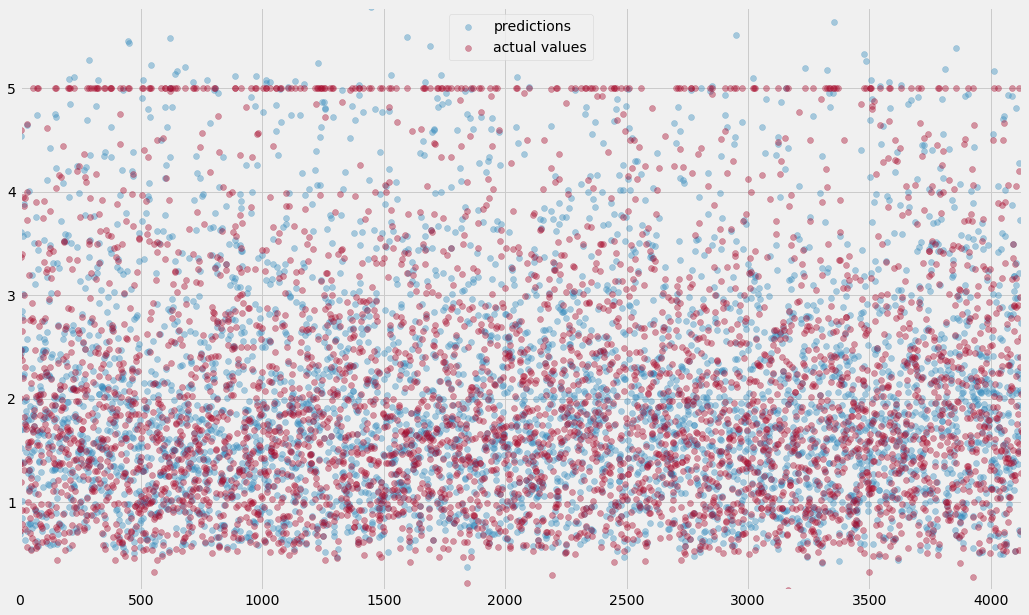

In [29]:
plt.figure(figsize=(16, 10))

plt.scatter(range(predictions.shape[0]), predictions, label='predictions', c='#348ABD', alpha=0.4)
plt.scatter(range(y_test.shape[0]), y_test, label='actual values', c='#A60628', alpha=0.4)
plt.ylim([y_test.min(), predictions.max()])
plt.xlim([0, predictions.shape[0]])
plt.legend();


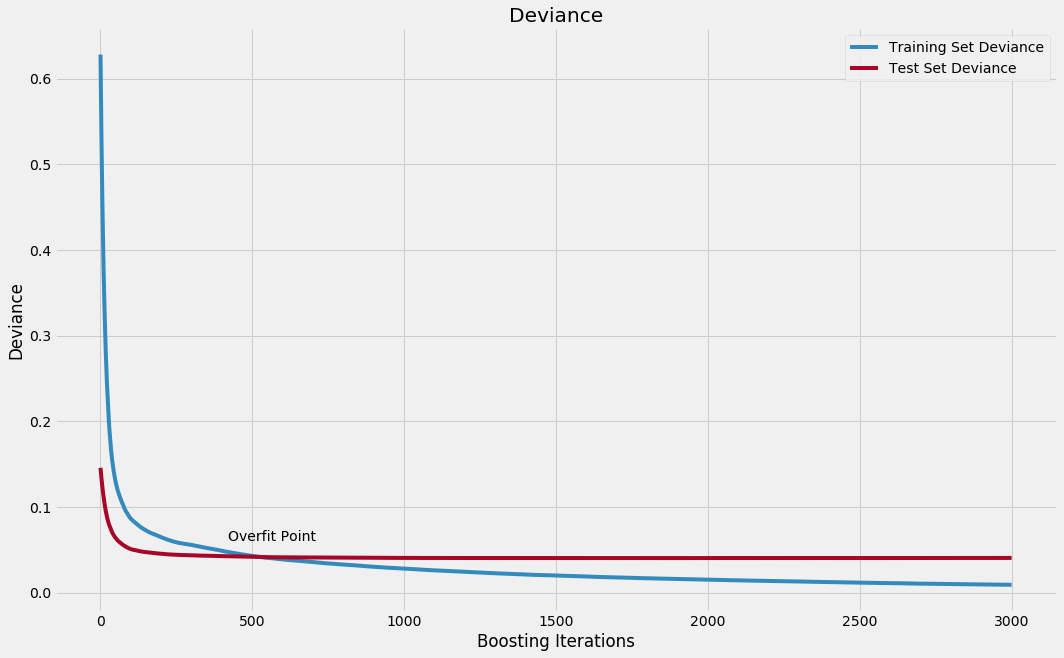

In [30]:
test_score = [classifier.loss_(y_test, y_pred) for y_pred in classifier.staged_predict(X_test)]

plt.figure(figsize=(16, 10))
plt.title('Deviance');
plt.plot(np.arange(parameters['n_estimators']) + 1, classifier.train_score_, c='#348ABD',
         label='Training Set Deviance');
plt.plot(np.arange(parameters['n_estimators']) + 1, test_score, c='#A60628',
         label='Test Set Deviance');
plt.annotate('Overfit Point', xy=(600, test_score[600]), xycoords='data',
            xytext=(420, 0.06), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc"),
            )
plt.legend(loc='upper right');
plt.xlabel('Boosting Iterations');
plt.ylabel('Deviance');

# 2. Scikit Learn - Parameter Search via Grid Search

In [31]:
from sklearn import model_selection
from sklearn import datasets
from sklearn import grid_search
import time

/Users/viswanathravindran/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [32]:
param_grid = {
              'learning_rate': [0.1],# you can addd more
              'max_depth': [6, 8],# you can add more 4, 10, 15
              'min_samples_leaf': [15], # somme additional splits 6
              'n_estimators': [1000, 3000],
              }

est = ensemble.GradientBoostingRegressor()

start_time = time.time()
gs_cv = grid_search.GridSearchCV(est, param_grid, n_jobs=4).fit(X_train, y_train)
end_time = time.time()

print('It took {:.2f} seconds'.format(end_time - start_time))
# best hyperparameter setting
gs_cv.best_params_

It took 364.04 seconds


{'learning_rate': 0.1,
 'max_depth': 6,
 'min_samples_leaf': 15,
 'n_estimators': 1000}

In [33]:
gs_cv.best_score_

0.8375375482208351

In [34]:
gs_cv.grid_scores_

[mean: 0.83754, std: 0.00155, params: {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 15, 'n_estimators': 1000},
 mean: 0.83503, std: 0.00146, params: {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 15, 'n_estimators': 3000},
 mean: 0.83420, std: 0.00186, params: {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 15, 'n_estimators': 1000},
 mean: 0.83268, std: 0.00195, params: {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 15, 'n_estimators': 3000}]

# 3. Scikit Learn - Parameter Search via Randomized Parameter Search

When you cannot do a parameter search because the permutation of a number of parameters grow really fast. Then, you need to be smarter about grid search. You need to decrease your parameter search space without (hopefully) giving up too much performance. The performance of the classifier may not match to the grid search, and it is quite okay. Do not forget the loss function that we are optimizing for is not the loss function that will decide how successful the classifier or regressor is (this is the test loss and we do not have chance to look at it). So, even second or third best parameter set for a classifier or pipeline(we will come to this in the next notebook) may work pretty well in the real settings. That is to say, sub-optimal is acceptable if we are not losing too much with the trade-off gaining quite a bit performance. Luckily, RandomizedParameterSearch in scikit-learn does the hard work for us and without losing too much performance, we have similar results to the GridSearch in a much more efficient and faster way.

In [35]:
from operator import itemgetter
from scipy.stats import randint as sp_randint
from sklearn import cross_validation
from sklearn import preprocessing

In [36]:
url="https://raw.githubusercontent.com/bugra/pydata-dal-2015/master/data/titanic.csv"
df=pd.read_csv(url)

In [37]:
df.head(10)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male
5,6,1st,1,"Anderson, Mr Harry",47.0000,Southampton,"New York, NY",E-12,NaN,3,male
6,7,1st,1,"Andrews, Miss Kornelia Theodosia",63.0000,Southampton,"Hudson, NY",D-7,13502 L77,10,female
7,8,1st,0,"Andrews, Mr Thomas, jr",39.0000,Southampton,"Belfast, NI",A-36,NaN,NaN,male
8,9,1st,1,"Appleton, Mrs Edward Dale (Charlotte Lamson)",58.0000,Southampton,"Bayside, Queens, NY",C-101,NaN,2,female
9,10,1st,0,"Artagaveytia, Mr Ramon",71.0000,Cherbourg,"Montevideo, Uruguay",NaN,NaN,(22),male


In [38]:
label_encoder = preprocessing.LabelEncoder()
del df['row.names']
df['pclass'] = label_encoder.fit_transform(df.pclass)
#d
df['sex'] = label_encoder.fit_transform(df.sex)
def convert_age(number):
    try:
        number = int(number)
    except ValueError:
        number = 0
    return number

def extract_home_destination(address):
    try:
        address = address.split(',')[-1]
    except AttributeError:
        address = ''
    return address

df.age = df.age.apply(convert_age)
# Preprocess first
df['home.dest'] = df['home.dest'].apply(extract_home_destination)
df['destination'] = label_encoder.fit_transform(df['home.dest'])
del df['home.dest']
del df['boat']
del df['ticket']
del df['name']
del df['room']
y = np.array(df.survived.tolist())
del df['survived']
del df['embarked']
df.head()

,pclass,age,sex,destination
0,0,29,0,44
1,0,2,0,63
2,0,30,1,63
3,0,25,0,63
4,0,0,1,63


In [39]:
feature_names = ['pclass', 'age', 'sex', 'destination']
X = df[feature_names].as_matrix()

In [40]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

In [42]:
param_grid = {
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 6],
              'min_samples_leaf': [1, 2, 3, 4, 9, 15],
              'n_estimators': [1000, 2000, 3000],
              }

est = ensemble.GradientBoostingClassifier()

start_time = time.time()
# run randomized search
n_iter_search = 20
randomized_search = grid_search.RandomizedSearchCV(est, param_distributions=param_grid,
    n_iter=n_iter_search, n_jobs=4).fit(X_train, y_train)

gs_cv = grid_search.GridSearchCV(est, param_grid, n_jobs=4).fit(X_train, y_train)
end_time = time.time()

print('It took {} seconds'.format(end_time - start_time))

It took 520.0481278896332 seconds


In [43]:
# best hyperparameter setting
randomized_search.best_params_

{'learning_rate': 0.01,
 'max_depth': 6,
 'min_samples_leaf': 1,
 'n_estimators': 3000}

In [44]:
randomized_search.best_score_

0.8

In [45]:
randomized_search.grid_scores_

[mean: 0.78476, std: 0.01174, params: {'n_estimators': 3000, 'min_samples_leaf': 3, 'max_depth': 4, 'learning_rate': 0.1},
 mean: 0.79238, std: 0.01327, params: {'n_estimators': 3000, 'min_samples_leaf': 9, 'max_depth': 6, 'learning_rate': 0.01},
 mean: 0.78857, std: 0.01633, params: {'n_estimators': 3000, 'min_samples_leaf': 4, 'max_depth': 6, 'learning_rate': 0.05},
 mean: 0.78476, std: 0.02450, params: {'n_estimators': 3000, 'min_samples_leaf': 15, 'max_depth': 4, 'learning_rate': 0.1},
 mean: 0.79048, std: 0.01174, params: {'n_estimators': 1000, 'min_samples_leaf': 2, 'max_depth': 4, 'learning_rate': 0.1},
 mean: 0.78476, std: 0.01197, params: {'n_estimators': 3000, 'min_samples_leaf': 3, 'max_depth': 4, 'learning_rate': 0.01},
 mean: 0.79714, std: 0.00700, params: {'n_estimators': 2000, 'min_samples_leaf': 2, 'max_depth': 4, 'learning_rate': 0.05},
 mean: 0.79524, std: 0.00269, params: {'n_estimators': 3000, 'min_samples_leaf': 1, 'max_depth': 4, 'learning_rate': 0.01},
 mean: 0.7

In [46]:
#Compare between Grid Search and Randomized Parameter search

In [47]:
clf = ensemble.RandomForestClassifier()

def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for ii, score in enumerate(top_scores):
        print("Model with rank: {}".format(ii + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {}\n".format(score.parameters))

param_grid = {"max_depth": [3, 2, 1, None],
              "max_features": [1, 2, 3, 4],
              #"min_samples_split": [1.0, 2.0, 3.0, 4.0],
              "min_samples_leaf": [1, 2, 3, 4],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              'n_estimators': [50, 100, 1000, 2000, 3000],
}

n_iter_search = 20
random_search = grid_search.RandomizedSearchCV(clf, param_distributions=param_grid,
                                   n_iter=n_iter_search)
"""
start = time.time()
random_search.fit(X, y)
end = time.time()
print("RandomizedSearchCV took {0:.2f} seconds for {1} candidates"
      " parameter settings.".format((end - start), n_iter_search))
report(random_search.grid_scores_)


param_grid = {"max_depth": [3, 2, 1, None],
              "max_features": [1, 2, 3, 4],
              #"min_samples_split": [1.0, 2.0, 3.0, 4.0],
              "min_samples_leaf": [1, 2, 3, 4],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              'n_estimators': [50, 100, 1000, 2000, 3000],
}

gs = grid_search.GridSearchCV(clf, param_grid=param_grid)
start = time.time()
gs.fit(X, y)
end = time.time()

print("GridSearchCV took {0:.2f} seconds for {1} candidate parameter settings.".format((
end - start, len(gs.grid_scores_))))
report(gs.grid_scores_)
"""


RandomizedSearchCV took 222.61 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.631 (std: 0.177)
Parameters: {'n_estimators': 50, 'min_samples_leaf': 1, 'max_features': 3, 'max_depth': 3, 'criterion': 'entropy', 'bootstrap': False}

Model with rank: 2
Mean validation score: 0.628 (std: 0.215)
Parameters: {'n_estimators': 100, 'min_samples_leaf': 2, 'max_features': 2, 'max_depth': 1, 'criterion': 'entropy', 'bootstrap': False}

Model with rank: 3
Mean validation score: 0.625 (std: 0.080)
Parameters: {'n_estimators': 2000, 'min_samples_leaf': 3, 'max_features': 1, 'max_depth': 1, 'criterion': 'entropy', 'bootstrap': False}



TypeError: unsupported format string passed to tuple.__format__

In [48]:
import csv
import json
from sklearn import decomposition
from sklearn import feature_extraction
from sklearn import feature_selection
from sklearn import naive_bayes
from sklearn import pipeline
pd.set_option('display.max_columns', None)

url="https://raw.githubusercontent.com/bugra/pydata-dal-2015/master/data/SMSSpamCollection"
df=pd.read_csv(url, sep='\t', header=None, names=['Label', 'Text'])
df.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [49]:
y = (df.Label == 'ham').values.astype(int)
X = df.Text.values

In [50]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

Let us create our pipeline

In [51]:
pipe = pipeline.Pipeline([('vect', feature_extraction.text.CountVectorizer()),
                          ('tfidf', feature_extraction.text.TfidfTransformer()),
                          ("bernoulli", naive_bayes.BernoulliNB()),
                         ])

In [52]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...e_idf=True)), ('bernoulli', BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True))])

In [53]:
metrics.accuracy_score(pipe.predict(X_test), y_test)

0.98116591928251118

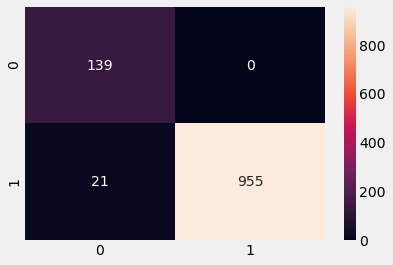

In [54]:
sns.heatmap(metrics.confusion_matrix(pipe.predict(X_test), y_test), annot=True,  fmt='');

In [55]:
print(metrics.classification_report(pipe.predict(X_test), y_test))

             precision    recall  f1-score   support

          0       0.87      1.00      0.93       139
          1       1.00      0.98      0.99       976

avg / total       0.98      0.98      0.98      1115



Grid Search in Pipeline
One might apply grid search to the pipeline similar to what we did on the estimator as well. Then one may ask, how do we pass parameters for vectorizer, feature selector and classifier. In the grid search of an estimator, this would be easy as you could pass a dictionary which has the keys for the parameters and the parameters as lists that you want to optimize. However, the things in pipeline is not that straightforward. First, what if two estimators share the same parameter name and you want to give different values in the search space. What if you do not want to pass any list of parameter to one and pass to the other one? In order to handle this ambiguity, pipeline accepts parameters in the form of {name}__{parameter} in the dictionary where the {name} is the name of the step that you are passing to the pipeline and the parameter is the parameter name that you want to optimize in that step.

In [56]:
params = dict(vect__max_df=[0.5, 1.0],
              vect__max_features=[None, 10000, 200000],
              vect__ngram_range=[(1, 1), (1, 2)],
              tfidf__use_idf=[True, False],
              tfidf__norm=['l1', 'l2'],
              bernoulli__alpha=[0, .5, 1],
              bernoulli__binarize=[None, .1, .5],
              bernoulli__fit_prior=[True, False]
             )

In [57]:
random_search = grid_search.RandomizedSearchCV(pipe, param_distributions=params,
                                   n_iter=n_iter_search, scoring='f1')

In [58]:
random_search.fit(X_train, y_train)

/Users/viswanathravindran/anaconda/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/viswanathravindran/anaconda/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/viswanathravindran/anaconda/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/viswanathravindran/anaconda/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/viswanathravindran/anaconda/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric e

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...e_idf=True)), ('bernoulli', BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True))]),
          fit_params={}, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'vect__max_df': [0.5, 1.0], 'vect__max_features': [None, 10000, 200000], 'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': [True, False], 'tfidf__norm': ['l1', 'l2'], 'bernoulli__alpha': [0, 0.5, 1], 'bernoulli__binarize': [None, 0.1, 0.5], 'bernoulli__fit_prior': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='f1', verbose=0)

In [59]:
random_search.best_estimator_


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...use_idf=True)), ('bernoulli', BernoulliNB(alpha=0, binarize=0.1, class_prior=None, fit_prior=True))])

In [60]:
random_search.grid_scores_

[mean: 0.98733, std: 0.00130, params: {'vect__ngram_range': (1, 1), 'vect__max_features': 10000, 'vect__max_df': 1.0, 'tfidf__use_idf': False, 'tfidf__norm': 'l1', 'bernoulli__fit_prior': False, 'bernoulli__binarize': None, 'bernoulli__alpha': 0},
 mean: 0.92951, std: 0.00016, params: {'vect__ngram_range': (1, 1), 'vect__max_features': None, 'vect__max_df': 1.0, 'tfidf__use_idf': True, 'tfidf__norm': 'l2', 'bernoulli__fit_prior': False, 'bernoulli__binarize': 0.5, 'bernoulli__alpha': 0.5},
 mean: 0.98435, std: 0.00135, params: {'vect__ngram_range': (1, 1), 'vect__max_features': 200000, 'vect__max_df': 1.0, 'tfidf__use_idf': True, 'tfidf__norm': 'l2', 'bernoulli__fit_prior': True, 'bernoulli__binarize': 0.1, 'bernoulli__alpha': 1},
 mean: 0.99152, std: 0.00109, params: {'vect__ngram_range': (1, 1), 'vect__max_features': None, 'vect__max_df': 1.0, 'tfidf__use_idf': True, 'tfidf__norm': 'l2', 'bernoulli__fit_prior': True, 'bernoulli__binarize': 0.1, 'bernoulli__alpha': 0},
 mean: 0.13027,

In [61]:
best_pipe = pipeline.Pipeline([('vect', feature_extraction.text.CountVectorizer(ngram_range=(1, 1), max_df=1.0, max_features=20000)),
                               ('tfidf', feature_extraction.text.TfidfTransformer(use_idf=True, norm='l2')),
                               ("bernoulli", naive_bayes.BernoulliNB(binarize=0.1, alpha=.5, fit_prior=True)),
                              ])

In [62]:
best_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=20000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        stri...e_idf=True)), ('bernoulli', BernoulliNB(alpha=0.5, binarize=0.1, class_prior=None, fit_prior=True))])

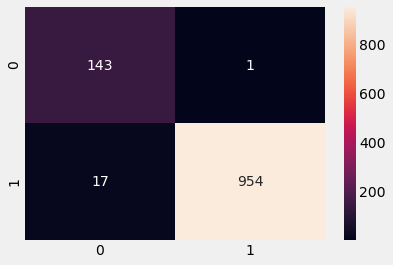

In [63]:
sns.heatmap(metrics.confusion_matrix(best_pipe.predict(X_test), y_test), annot=True,  fmt='');

In [64]:
print(metrics.classification_report(best_pipe.predict(X_test), y_test))

             precision    recall  f1-score   support

          0       0.89      0.99      0.94       144
          1       1.00      0.98      0.99       971

avg / total       0.99      0.98      0.98      1115



# Feature Union
Pipeline is generally laid out as sequential steps and this is not a coincidence. Generally, feature extractor, feature selector and classifiers are applied in a consecutive manner for a supervised learning problem. In feature extraction, some may want to first extract bag-of-words then weight by Tf-Idf to improve the feature extractor. However, there could be also cases that some may want to concatenate the features rather than applying as sequential steps.
FeatureUnion class aims to solve this problem. You could combine different feature extractor outputs independently into a single feature matrix and then use it. This is quite useful for a number of reasons; first it works just like pipeline, you could give a tuple where one of the arguments is estimator name and other estimator itself. Second, the object could be used as a step in the pipeline, so it is very easy to use. Third, it allows you to experiment different feature extractor methods and possbily use them if you have a good feature selector method. Last but not least, it allows you to abstract the feature extraction step in a single step even if the features you aggregate could vary a lot. It does multiple feature extraction operations in parallel, so if you have multi-cores, you are in luck in terms of processing time.